# 08.00 Machine Learning Groupings, Again

We saw that we can divide machine learning models in four categories.

* Supervised Learning
  - Classification
  - Regression
* Unsupervised Learning
  - Dimensionality Reduction
  - Clustering

And although this grouping is quite outdated we will follow it for the time being.
We did skim over classification and regression but more importantly
we did see how we evaluate ML models and how we automate the evaluation.
Now, one may be surprised that we already went through the majority
of way of evaluating an ML model.

In *unsupervised learning* there are no good ways to know whether a model
works well or not.
Instead, faced with a problem against which we need to attempt unsupervised learning,
we need to attempt to transform at least part of the problem into supervised
learning and evaluate it with accuracy scores, f1 measures, and so on.

Often we do not have labels for the data we use unsupervised learning on,
in such a case any form of model evaluation will be very difficult.
Perhaps the easiest way to evaluate a model for a problem for which we have
no labels at all and cannot get any labels,
is to find a similar problem for which we have labels and train a model
on that similar problem.
Once we evaluate a good model on the similar problem we assume that
it will work in a similar fashion on the original problem.

Most of the time with unsupervised learning we have or can get at least
a handful of labels.
We can then evaluate our unsupervised model on the handful of labels
in a similar fashion as we would do for a supervised one.
This can be sometimes called *semi-supervised learning*,
and is our first indication that the list of ML groupings
at the top is quite incomplete.

### Dimensionality Reduction

Will allow us to explore the data in lesser dimensions, whatever we call the dimension.
Here we come back to the concept of **distance**.
We did see different distances such as L-norms, including `L1` and `L2`,
but many other measures can be made to work as a distance:
sum of coordinates and polynomial functions on top of the data
are distances we have already used;
other distances include measures such as cosine similarity or probabilities.
Don't worry what these exactly are right now,
we will explore some of the ways of measuring distance.

Independent of what we use for distance,
we say that two points (samples) are **similar** if they are close to one another,
and **dissimilar** if they are far apart.

One way to evaluate dimensionality reduction is to perform the reduction to a
set of numbers we can visualize and then check *by-the-eye* that
things close together are the ones we expect to be similar and
things far apart are the ones we expect to be dissimilar.

When we have a handful of labels we can perform the dimensionality
reduction and then train another model on top of the reduced data.
The performance of the resulting model will be an indication
of the performance of the dimensionality reduction technique.

### Clustering

Is similar to the models we have already seen when looking at supervised learning.
Instead of changing the structure of the space where the data lives
as is done with dimensionality reduction,
clustering attempts to identify the structure in the data.
The identification of this structure is again performed
by means of **distance** in one form or another.

One builds *clusters*, structures which then allow new (unseen) data
to be classified into one of these clusters.
We argue that samples that are **similar** to each other are in a cluster together,
and in a different cluster from samples that are **dissimilar** to them.
Contrary to supervised learning one such cluster has no meaning,
unless we give it one using a guesstimate, *by-the-eye*, evaluation.
Without labels clusters are just groupings of data,
yet seeing such groupings we may be able to guess labels for them.

If we have some labels then we can check what label
is present for the majority of samples in a cluster and give the cluster a meaning.
In this fashion we can evaluate a clustering model in a similar way
to supervised learning models.
We can then say that a good clustering would group together the samples according
to their labels.

When one has no labels at all and cannot guesstimate them there remains
possibility of evaluating the shape of the clusters.
Clusters live in the space where the data lives.
Evaluation techniques can geometrically check whether the clusters are
round or dense.
And the concept of round or dense can be changed slightly depending
of how we measure *distance*.
Still, geometric techniques for clustering evaluation are rather limited,
and are an area of active research.

---

Let's import a handful of things that will help us with the next topic.

We will need a handful of mathematical concepts,
although not necessarily equations,
in order to advance from here.
We will also have a quick look at a few mathematicians
that allowed us to get where we are today.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

![Kurt Gödel](ul-godel.svg)

<div style="text-align:right;"><sup>ul-godel.svg</sup></div>

<div style="border: 0.3em double teal; border-radius: 0.5em; padding: 0.5em">
    Kurt Gödel's incompleteness theorems, from 1931,
    were one of the greatest turns in Mathematical thinking.
    The theorem's themselves only prove the impossibility of building a full set
    of mathematical axioms which would explain the axioms themselves.
    Despite the fact that the theorem's only build upon the axioms of arithmetic,
    the deepest ideas behind it proved to be revolutionary.
    Later works and interpretations of Gödel's theorems built the idea that
    mathematics cannot ever be proven by mathematics themselves,
    which placed applied mathematics on the same level as "pure" theoretical mathematics.
    This line of thinking also led to the rejection of the idea that there must
    exist a set of first principles for every phenomena.
</div>

## Linearity

For a long time science assumed the linearity of the world.
This is another way to say that science believed that every phenomena
can be distilled to its first principles and then those first principles
will combine in a linear fashion to produce the more complex phenomena.
That is a lot of talk that does not actually tell us what this linearity is.
It often is the case that the exact definition of linearity is slightly
different depending on the discipline one looks at.
Instead we will attempt to define where *linearity fails*
and work backward from there.

On the assumption that one would be capable of dividing the world into
all its first principles then, by definition,
none of the first principles could be correlated with any of the
other first principles.
Otherwise, if the first principles are indeed correlated, 
then one first principle is dependent on the other and hence not
a first principle but phenomena caused by the other first principle.

Let us play with this concept and build two graphs:
the capital letter B, and some white noise - a completely uniform
random set of points - and make their histograms in each dimension.

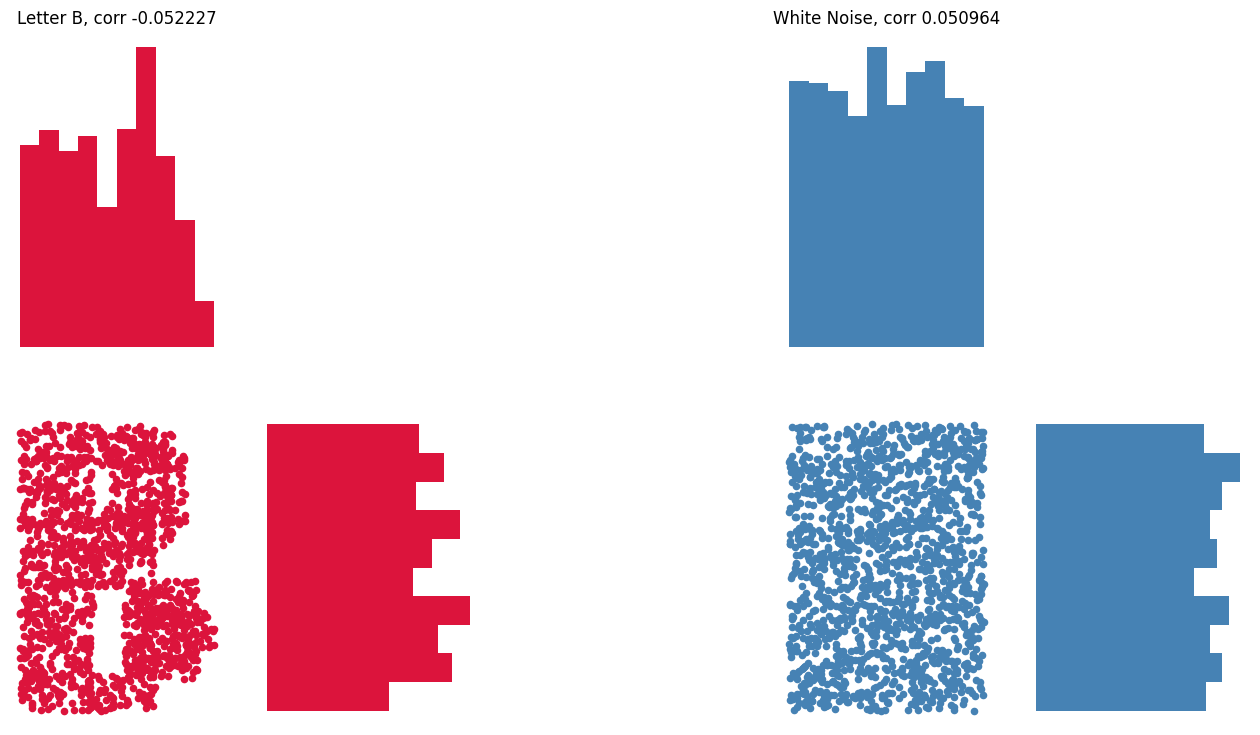

In [2]:
B = np.array(
    [
        [0.1, 0.9],
        [0.20, 0.9],
        [0.23, 0.87],
        [0.1, 0.8],
        [0.25, 0.8],
        [0.1, 0.7],
        [0.25, 0.7],
        [0.23, 0.63],
        [0.1, 0.6],
        [0.20, 0.6],
        [0.1, 0.5],
        [0.20, 0.5],
        [0.1, 0.4],
        [0.27, 0.4],
        [0.27, 0.37],
        [0.1, 0.3],
        [0.30, 0.3],
        [0.27, 0.23],
        [0.1, 0.2],
        [0.27, 0.2],
        [0.1, 0.1],
        [0.20, 0.1],
    ]
)
noise = []
rng = np.random.default_rng()
for _ in range(70):
    noise.append(B + rng.random(B.shape) * 0.12)
B = np.vstack(noise)
white = rng.random(B.shape)

fig, ax = plt.subplots(2, 5, figsize=(16, 9))
ax[1, 0].scatter(B[:, 0], B[:, 1], s=20, c="crimson")
ax[0, 0].hist(B[:, 0], color="crimson")
ax[0, 0].set_title("Letter B, corr %.06f" % np.corrcoef(B[:, 0], B[:, 1])[0, 1])
ax[1, 1].hist(B[:, 1], color="crimson", orientation="horizontal")
ax[1, 3].scatter(white[:, 0], white[:, 1], s=20, c="steelblue")
ax[0, 3].hist(white[:, 0], color="steelblue")
ax[0, 3].set_title(
    "White Noise, corr %.06f" % np.corrcoef(white[:, 0], white[:, 1])[0, 1]
)
ax[1, 4].hist(white[:, 1], color="steelblue", orientation="horizontal")
for img in ax.flat:
    img.axis("off")

In both graphs we only have points in $2$ dimensions,
and we evaluated the correlation between the $2$ dimensions in each case.
Both the capital letter B and the white noise have pretty much
no correlation between the dimensions in which they exist.

If we accept the approximation that the correlations are indeed exactly zero,
then we can argue that we have separated the world where the letter B
and the white noise live into its first principles:
the positions on the x-axis and the positions on the y-axis.
And since the positions and correlations are pretty much the same
the letter B and the white noise are *exactly the same thing*!

Obviously they are not the same thing.
We can see the letter B because our human brain is very good
at finding non-linear patters.
When we draw a capital letter B we do not take notice of exactly
where we place each part of the letter.
Instead we take effort to make sure that the letter B has one
straight side and round holes in it.
*The exact position of the parts of B does not matter,
what matters is the position between the parts of B*.

## Here be Dragons - where Linearity Breaks

The letter B has a pattern we can identify with our human brain
which do not follow from the definition of the two-dimensional
world built by positions of points with two coordinates.
Finding such patters as the letter B in the example
is a case of a **non-linear problem**.

How do we know that a problem is non-linear?
Well, we do not.
The only way to know that there is more to be seen than
what is possible by splitting the entire world where the problem lives
into its first principles,
is to perform the splitting and attempting to solve the problem.
If the problem cannot be solved by splitting it into first
(uncorrelated) principles then it is a non-linear problem.
With experience one learns to identify non-linear problems.
Notably, the world has many more non-linear problems than linear ones.

Linearity of problems, even when just an approximation,
allows for several nice properties.
Linear Algebra and Univariate statistics describe linear problems well,
and have several closed form solutions (solutions than can be
evaluated straight away).
Hence it is worth to first attempt a linear solution to a problem
before assuming that it is non-linear.

That being said, assuming that everything in the world around us
can be explained by splitting it into first principles - and that
linear techniques work on every problem - is akin of hitting a
square peg into a round hole.
In the case above one would just assume that every letter B
is just white noise and never find out what B may actually be.

### A Note on Statistics

Univariate Statistics, where each random variable
(or each feature when thinking about date) is described by a distribution with a singe peak,
are not the only form of statistics.
There are statistics which account for the possibility of non-linear patterns in the data.
Univariate statistics are just more common,
since they include the assumption of a Gaussian distribution of the data.
And the Central Limit Theorem we mentioned earlier is also a form
of univariate statistics since it is a sum of several univariate
distributions (distributions with a single peak).
Wilcoxon statistics and Tsallis statistics are examples
of statistics that account for non-linearities.

Whether the commonalty of univariate statistics is due to the fact that
linear problems are easier is up to debate.
One can argue that the only reason why linear problems are easier is
because we have more tools to deal with them.
If mathematics has had developed in a different way than it did,
perhaps today we would argue that non-linear problems are easy
and non-linear problems are hard.
That said,
we currently have many more tools to deal with linear problems,
hence we often argue that for practical purposes
linear problems are easy to solve and non-linear ones are hard.